In [103]:
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.utils import to_categorical,split_dataset
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sns; sns.set()
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [104]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(50000, 32, 32, 3)

(50000, 1)

(10000, 32, 32, 3)

(10000, 1)

The image contain 50000 train set and 10000 test set. The image and label consist of different image from 10 different categories hence its name CIFAR10. The test and train set consist of the image itself denoted as X and the label denoted as y. The image consist of 32x32 pixel with 3 colours data (red, green, blue). While the label consist of index of the label.

In [105]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [106]:
# Standardizing (255 is the total number of pixels an image can have)
X_test = X_test / 255 
X_train = X_train / 255

# One hot encoding the target class (labels)
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [107]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

In [108]:
# Print the shape of data
print(X_train)
print(y_train)
print(X_valid)
print(X_test.shape)
print(y_test.shape)

[[[[0.03921569 0.03921569 0.03921569]
   [0.07843137 0.07843137 0.07843137]
   [0.03529412 0.03529412 0.03529412]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.01176471 0.01176471 0.01176471]
   [0.02745098 0.02745098 0.02745098]
   [0.03921569 0.03921569 0.03921569]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.01176471 0.01176471 0.01176471]
   [0.00784314 0.00784314 0.00784314]
   [0.01960784 0.01960784 0.01960784]
   ...
   [0.00784314 0.         0.        ]
   [0.00392157 0.         0.        ]
   [0.00392157 0.         0.        ]]

  ...

  [[0.07058824 0.05882353 0.02745098]
   [0.22745098 0.19607843 0.12941176]
   [0.35294118 0.29411765 0.19215686]
   ...
   [0.00784314 0.         0.00392157]
   [0.00784314 0.         0.        ]
   [0.00784314 0.         0.        ]]

  [[0.03921569 0.01568627 0.00784314]
   [0.0

# Plot the first 10 images from each category

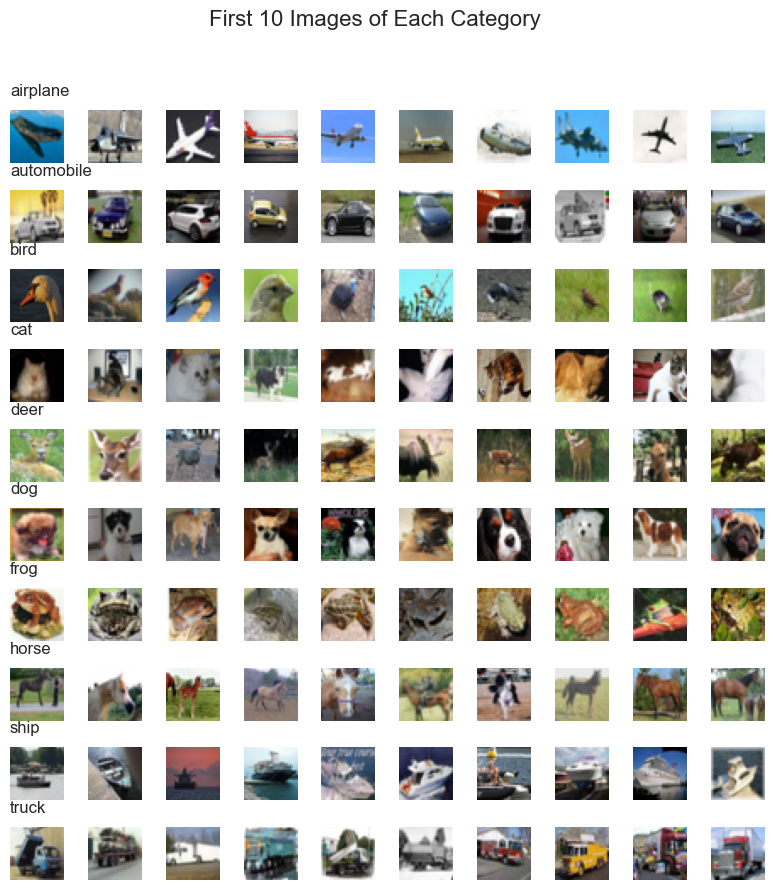

In [109]:
# Plot the first 10 images from each category
fig, axes = plt.subplots(num_classes, 10, figsize=(10, 10))
fig.suptitle("First 10 Images of Each Category", fontsize=16)
plt.subplots_adjust(hspace=0.5, wspace=0.05)  # Adjust wspace to make images closer horizontally

for i in range(num_classes):
    category_indices = np.where(np.argmax(y_train, axis=1) == i)[0]  # Get indices of images in this category
    for j in range(10):
        ax = axes[i, j]
        ax.imshow(X_train[category_indices[j]])
        ax.axis('off')
        if j == 0:
            ax.set_title(classes[i], loc='left', fontsize=12, pad=10)  # Add category name to the left

plt.show()

In [110]:
# Image Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,          # Rotate images up to 15 degrees
    width_shift_range=0.1,      # Shift image width up to 10% of total width
    height_shift_range=0.1,     # Shift image height up to 10% of total height
    horizontal_flip=True,       # Flip images horizontally
    zoom_range=0.1              # Zoom in or out by 10%
)

datagen.fit(X_train)

# Image Augmentation

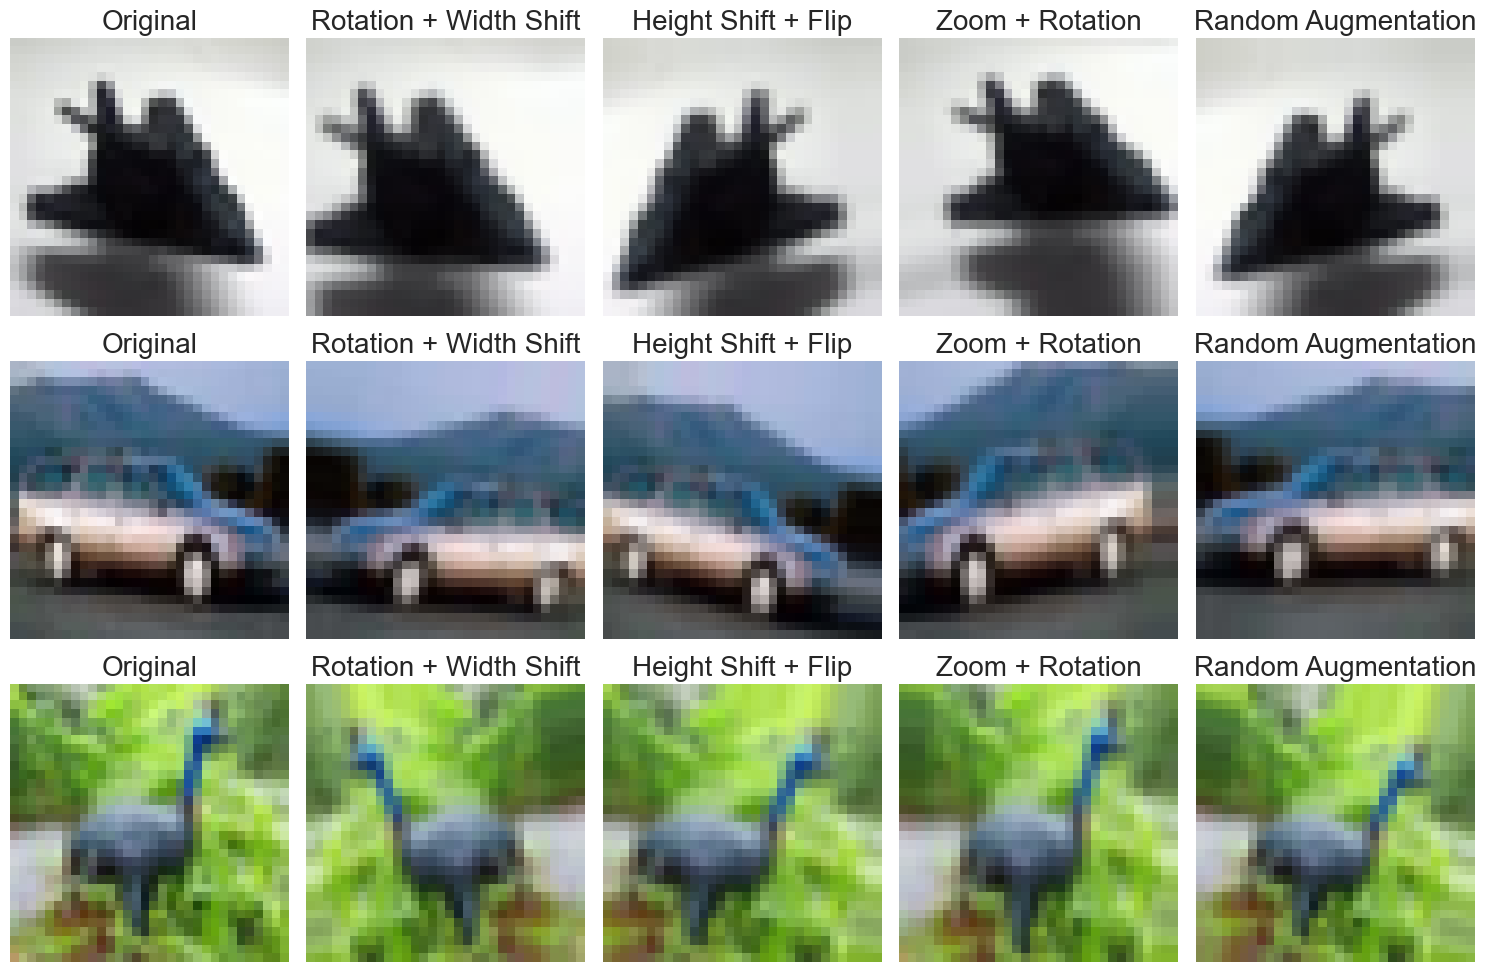

In [124]:
# Select one image from each of the first three classes
sample_images = []
for class_index in range(3):
    class_image = X_train[y_train.flatten() == class_index][0]
    sample_images.append(class_image)

# Define titles for augmentation techniques
augmentation_titles = [
    "Original",
    "Rotation + Width Shift",
    "Height Shift + Flip",
    "Zoom + Rotation",
    "Random Augmentation"
]

# Create the plot with 3 rows (one for each class) and 5 columns (original + 4 augmentations)
fig, axes = plt.subplots(3, 5, figsize=(15, 10))
for row in range(3):
    for col in range(5):
        if col == 0:
            # Show the original image
            image = sample_images[row]
            title = f"Original"
        else:
            # Generate an augmented version of the image
            image = next(datagen.flow(np.expand_dims(sample_images[row], axis=0), batch_size=1))[0]
            title = augmentation_titles[col]  # Display a title for each augmentation

        # Display the image with bold title text
        ax = axes[row, col]
        ax.imshow(image.astype('uint8'))
        ax.set_title(f"{title}", fontsize=20)
        ax.axis('off')

plt.tight_layout()
plt.show()
